In [202]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns 

In [197]:
data.head()

,security_code,ddate,SALES_REV_TURN,IS_OPER_INC,NET_INCOME,BS_TOT_ASSET,BS_CASH_NEAR_CASH_ITEM,BS_MKT_SEC_OTHER_ST_INVEST,BS_CUR_ASSET_REPORT,BS_LT_INVEST,...,ARD_DEFERRED_TAX_LIAB_LT,ARD_CURRENT_PORTION_OF_LT_DEBT,MINORITY_NONCONTROLLING_INTEREST,BS_AMT_OF_TSY_STOCK,IS_PERSONNEL_EXP,PRETAX_INC,BS_TOT_NON_CUR_ASSET,BS_NUM_OF_TSY_SH,BS_SH_OUT,HISTORICAL_MARKET_CAP
0,AAL,2000,14824.000,2368.000,1957.000,30616.000,1061.000,2344.000,8127.000,935.000,...,0.0,0.0,2646.0,-0.0,-3067.000,3444.000,22489.000,0.0,1483.8861,22469.2680
1,ABF,2000,4406.000,327.000,138.000,3867.000,65.000,1133.000,2220.000,4.000,...,0.0,0.0,78.0,-0.0,-581.000,245.000,1647.000,0.0,791.6740,2652.1079
2,ACL,2000,245.360,13.484,8.232,146.453,8.461,0.000,86.766,0.000,...,0.0,0.0,0.0,-0.0,-28.867,12.451,59.687,0.0,35.4745,116.6681
3,ADB,2000,32.645,2.448,1.466,23.528,0.412,0.000,6.764,0.677,...,0.0,0.0,0.0,-0.0,-5.897,2.239,16.764,0.0,0.4720,20.2960
4,ADN,2000,115.721,34.225,24.126,274.148,45.815,3.054,91.628,25.218,...,0.0,0.0,0.0,-0.0,-34.826,33.961,182.520,0.0,240.4588,884.2819


In [199]:
# read the same table with english column names  

eng = pd.read_csv('ENG_LN_UNADJ.csv', encoding = 'cp932')
eng2 = eng.drop(eng.columns[0], axis = 1)

# removing all zero columns 

data = eng2.loc[:, (eng != 0).any(axis = 0)]

# generate 2015 & 2016 dataset

x_15= data[data['ddate'] == 2015]
y_16 = data[data['ddate'] == 2016][['security_code', 'HISTORICAL_MARKET_CAP']]

# remove zero MKTCAP entires 
x_20152 = x_15[x_15['HISTORICAL_MARKET_CAP'] != 0] 
x_2015 = x_20152.drop('HISTORICAL_MARKET_CAP', axis = 1 )
y_2016 = y_16[y_16['HISTORICAL_MARKET_CAP'] != 0]


# only keep the companeis that exist in both 2014 and 2015
eng3 = pd.merge(x_2015, y_2016, how = 'inner', on = ['security_code'])
print (eng3.shape)
eng3.head()

(1244, 43)


,security_code,ddate,SALES_REV_TURN,IS_OPER_INC,NET_INCOME,BS_TOT_ASSET,BS_CASH_NEAR_CASH_ITEM,BS_MKT_SEC_OTHER_ST_INVEST,BS_CUR_ASSET_REPORT,BS_LT_INVEST,...,ARD_DEFERRED_TAX_LIAB_LT,ARD_CURRENT_PORTION_OF_LT_DEBT,MINORITY_NONCONTROLLING_INTEREST,BS_AMT_OF_TSY_STOCK,IS_PERSONNEL_EXP,PRETAX_INC,BS_TOT_NON_CUR_ASSET,BS_NUM_OF_TSY_SH,BS_SH_OUT,HISTORICAL_MARKET_CAP
0,7DIG,2015,10.365,1.7420,-7.9130,7.339,1.6560,0.0,6.2200,0.0,...,0.0,0.0,0.0,-0.042,-13.4540,-7.9100,1.1190,0.2056,109.4609,7.3014
1,888,2015,462.100,40.8000,29.5000,386.300,178.6000,0.0,214.2000,2.4,...,1.7,0.0,0.0,-0.000,-102.2000,32.5000,172.1000,0.0000,357.0813,960.6034
2,AA/,2015,984.000,325.0000,69.0000,1958.000,302.0000,0.0,495.0000,0.0,...,0.0,0.0,0.0,-0.000,-310.0000,61.0000,1463.0000,0.0000,558.5263,1790.4874
3,AAA,2015,0.000,-0.3072,-0.3011,5.695,0.1916,0.0,0.1916,0.0,...,0.0,0.0,0.0,-0.000,-0.1434,-0.3011,5.5034,0.0000,212.8261,20.2185
4,AAL,2015,20455.000,-4261.0000,-5624.0000,52013.000,6895.0000,0.0,13797.0000,846.0,...,3253.0,0.0,4773.0,-6051.000,-3955.0000,-5454.0000,38216.0000,120.9381,1284.5272,18308.3621


In [13]:
d = pd.read_csv('MKTCAP_LN_UNADJ.csv', encoding = 'cp932')
dt = d.drop(data.columns[0], axis = 1)

dt.head()

,security_code,ddate,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,...,長期社債(当期返済分),長期借入金(当期返済分),少数持分,自己株金額,人件費,税引前利益,非流動資産合計,自己株式数,発行済株式数,value
0,AAL,2000,14824.000,2368.000,1957.000,30616.000,1061.000,2344.000,8127.000,935.000,...,0,0.0,2646.0,-0.0,-3067.000,3444.000,22489.000,0.0,1483.8861,22469.2680
1,ABF,2000,4406.000,327.000,138.000,3867.000,65.000,1133.000,2220.000,4.000,...,0,0.0,78.0,-0.0,-581.000,245.000,1647.000,0.0,791.6740,2652.1079
2,ACL,2000,245.360,13.484,8.232,146.453,8.461,0.000,86.766,0.000,...,0,0.0,0.0,-0.0,-28.867,12.451,59.687,0.0,35.4745,116.6681
3,ADB,2000,32.645,2.448,1.466,23.528,0.412,0.000,6.764,0.677,...,0,0.0,0.0,-0.0,-5.897,2.239,16.764,0.0,0.4720,20.2960
4,ADN,2000,115.721,34.225,24.126,274.148,45.815,3.054,91.628,25.218,...,0,0.0,0.0,-0.0,-34.826,33.961,182.520,0.0,240.4588,884.2819


In [15]:
# remove all zero columns.

data = dt.loc[:, (dt != 0).any(axis = 0)]
print(data.shape)

(16711, 43)


In [18]:
data.groupby('ddate').count()

,security_code,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,...,長期繰延税金負債,長期借入金(当期返済分),少数持分,自己株金額,人件費,税引前利益,非流動資産合計,自己株式数,発行済株式数,value
ddate,,,,,,,,,,,,,,,,,,,,,
2000,499,499,499,499,499,499,499,499,499,499,...,499,499,499,499,499,499,499,499,499,499
2001,539,539,539,539,539,539,539,539,539,539,...,539,539,539,539,539,539,539,539,539,539
2002,576,576,576,576,576,576,576,576,576,576,...,576,576,576,576,576,576,576,576,576,576
2003,634,634,634,634,634,634,634,634,634,634,...,634,634,634,634,634,634,634,634,634,634
2004,687,687,687,687,687,687,687,687,687,687,...,687,687,687,687,687,687,687,687,687,687
2005,782,782,782,782,782,782,782,782,782,782,...,782,782,782,782,782,782,782,782,782,782
2006,849,849,849,849,849,849,849,849,849,849,...,849,849,849,849,849,849,849,849,849,849
2007,948,948,948,948,948,948,948,948,948,948,...,948,948,948,948,948,948,948,948,948,948
2008,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,...,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014


In [183]:
# rows with zero for the value column in 2015

print (data[data['value'] == 0][data[data['value'] == 0]['ddate'] == 2015].shape)


# rows with zero for the value column in 2016

print(data[data['value'] == 0][data[data['value'] == 0]['ddate'] == 2016].shape)

(91, 43)
(43, 43)


In [70]:
# from the comparison with DB zero valued MKTCAP, these zero valued MKTCAP companies are actually comapnies without collected MKTCAP values
# remove them then merge the datasets from 2015 and 2016

# slicing 2015 and 2016 data 
x_15= data[data['ddate'] == 2015]
y_16 = data[data['ddate'] == 2016][['security_code','value']]

# remove zero MKTCAP entires 
x_20152 = x_15[x_15['value'] != 0] 
x_2015 = x_20152.drop('value', axis = 1 )
y_2016 = y_16[y_16['value'] != 0]


# only keep the companeis that exist in both 2014 and 2015
data2 = pd.merge(x_2015, y_2016, how = 'inner', on = ['security_code'])
print (data2.shape)

(1244, 43)


In [73]:
y_2016['value'].describe()

count      1304.000000
mean       2734.965723
std       20612.476696
min           0.038700
25%          13.097950
50%          67.768150
75%         461.313450
max      539463.030000
Name: value, dtype: float64

(1337, 43)


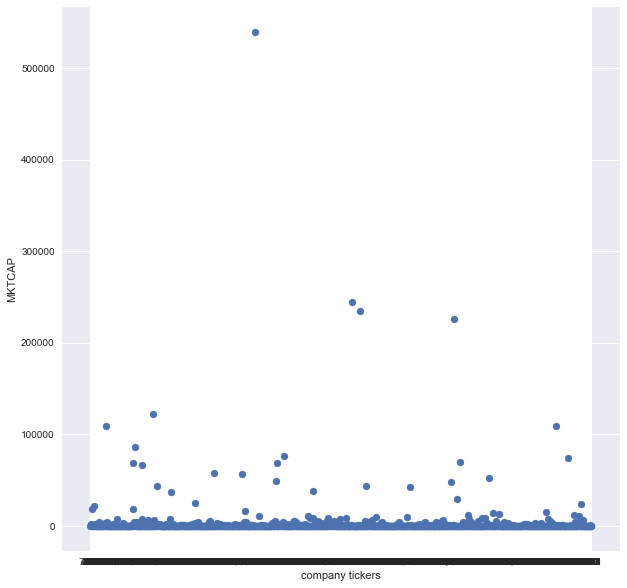

In [72]:
fig = plt.figure(figsize = (10, 10))

num = len(data2['security_code'])
x_plot = np.arange(num)
y_plot = data2['value']
my_ticks = list(data2['security_code'].values)

plt.xticks(x_plot, my_ticks)
plt.scatter(x_plot, y_plot)

plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

# zoom in on the bulk

In [75]:
# plot companies with MKTCAP greater than 500

plotd = data2[data2['value'] < 500]

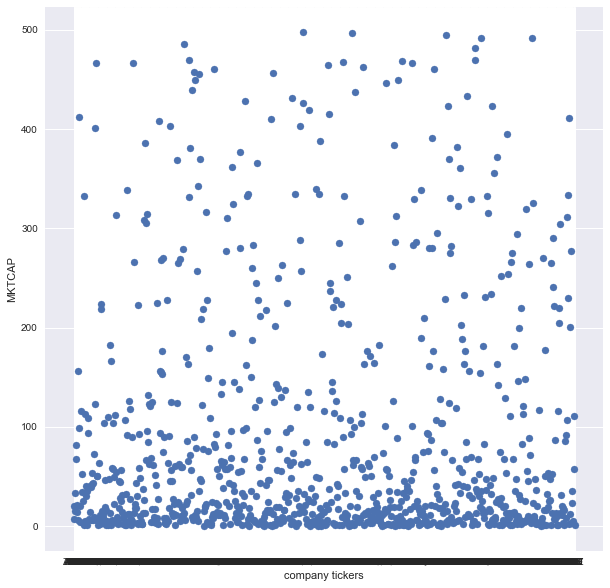

In [76]:
fig = plt.figure(figsize = (10, 10))

num = len(plotd['security_code'])
x_plot = np.arange(num)
y_plot = plotd['value']
my_ticks = list(plotd['security_code'].values)

plt.xticks(x_plot, my_ticks)
plt.scatter(x_plot, y_plot)

plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

# summary statistics 

In [200]:
# data column average 

data2[features].apply([np.mean, np.std])

,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,短期借入金,...,未払費用,長期繰延税金負債,長期借入金(当期返済分),少数持分,自己株金額,人件費,税引前利益,非流動資産合計,自己株式数,発行済株式数
mean,2553.248539,154.447671,92.221473,2999.838642,222.694081,40.766393,888.320974,48.512326,1216.114881,185.118887,...,2.457931,78.643265,5.490932,44.074118,-56.672127,-313.614080,107.601958,2042.405744,6.230816,398.806419
std,27079.856002,1587.293381,1014.454329,20847.792707,1563.368269,619.855885,6323.998570,526.573002,10157.250101,1672.027087,...,59.217358,553.586571,144.024459,489.502000,719.269673,2521.801105,1224.659634,15318.899255,84.699094,1235.103485


### boxplot

In [251]:
def plot_box(df, size_x, size_y):
    fig, ax = plt.subplots(figsize = (size_x, size_y))
    sns.boxplot(df, orient = "h")
#     sns.boxplot(x = df, y = eng3.iloc[:, -1])
#     sns.swarmplot(x = df, y = eng3.iloc[:, -1], color = "0.25")
    plt.show()

In [253]:
# plot_box(eng3.iloc[:, 2:-10], 50, 50)

### outliers 

In [256]:
def outliers(y):
    quantile_1, quantile_3 = np.percentile(y, [25, 75])
    iqr = quantile_3 - quantile_1
    lower = quantile_1 - (iqr * 1.5)
    upper = quantile_3 + (iqr * 1.5)
    
    return np.where((y > upper) | (y < lower))

In [267]:
outlier = np.ravel(outliers(eng3.iloc[:, -1]))

print (len(eng3.iloc[:, -1]))
print (outlier.shape)

print(outlier.shape[0]/ len(eng3.iloc[:, -1]))

1244
(205,)
0.1647909967845659


In [261]:
eng3.iloc[:, -1].describe()

count      1244.000000
mean       2841.679364
std       21096.528817
min           0.038700
25%          12.952250
50%          67.097500
75%         466.671050
max      539463.030000
Name: HISTORICAL_MARKET_CAP, dtype: float64

In [264]:
# companies considered as outliers accoring to Tukey's box and whisker plot with quantiles

eng3.iloc[eng3.iloc[:, -1][outlier].index].head()

,security_code,ddate,SALES_REV_TURN,IS_OPER_INC,NET_INCOME,BS_TOT_ASSET,BS_CASH_NEAR_CASH_ITEM,BS_MKT_SEC_OTHER_ST_INVEST,BS_CUR_ASSET_REPORT,BS_LT_INVEST,...,ARD_DEFERRED_TAX_LIAB_LT,ARD_CURRENT_PORTION_OF_LT_DEBT,MINORITY_NONCONTROLLING_INTEREST,BS_AMT_OF_TSY_STOCK,IS_PERSONNEL_EXP,PRETAX_INC,BS_TOT_NON_CUR_ASSET,BS_NUM_OF_TSY_SH,BS_SH_OUT,HISTORICAL_MARKET_CAP
2,AA/,2015,984.000,325.000,69.000,1958.000,302.000,0.0,495.000,0.0,...,0.000,0.0,0.0,-0.000,-310.000,61.000,1463.000,0.0000,558.5263,1790.4874
4,AAL,2015,20455.000,-4261.000,-5624.000,52013.000,6895.000,0.0,13797.000,846.0,...,3253.000,0.0,4773.0,-6051.000,-3955.000,-5454.000,38216.000,120.9381,1284.5272,18308.3621
7,ABC,2015,144.033,46.370,37.384,249.946,57.059,0.0,100.522,0.0,...,14.779,0.0,0.0,-2.812,-33.410,46.099,149.424,0.7945,201.0520,1560.0312
9,ABF,2015,12800.000,890.000,528.000,10219.000,702.000,0.0,3849.000,0.0,...,220.000,0.0,190.0,-0.000,-2058.000,707.000,6370.000,0.0000,791.6742,21462.2871
11,ACA,2015,868.131,-89.797,-197.148,2330.475,233.268,0.0,528.515,0.0,...,95.668,0.0,0.0,-0.000,-158.573,-124.160,1801.960,0.0000,410.0855,1892.3646


# check for multicollinearity in the feature matrix 

### heatmap

In [223]:
def plot_corr(df, size_x, size_y):
    """
        Plot seaborn correlation matrix for features from the dataframe
    """
    fig, ax = plt.subplots(figsize = (size_x, size_y))
    corr = df.corr()
    # truncate correlation matrix
    for col in corr.columns:
        corr[col] = corr[col].apply(lambda x: "%.3f" % x)
        corr[col] = corr[col].apply(lambda x: float(x))
    # seaborn plot
    sns.heatmap(corr, annot=True, fmt="g", cmap="viridis")
#     plt.savefig('corrwMKTCAP.png')
    plt.show()

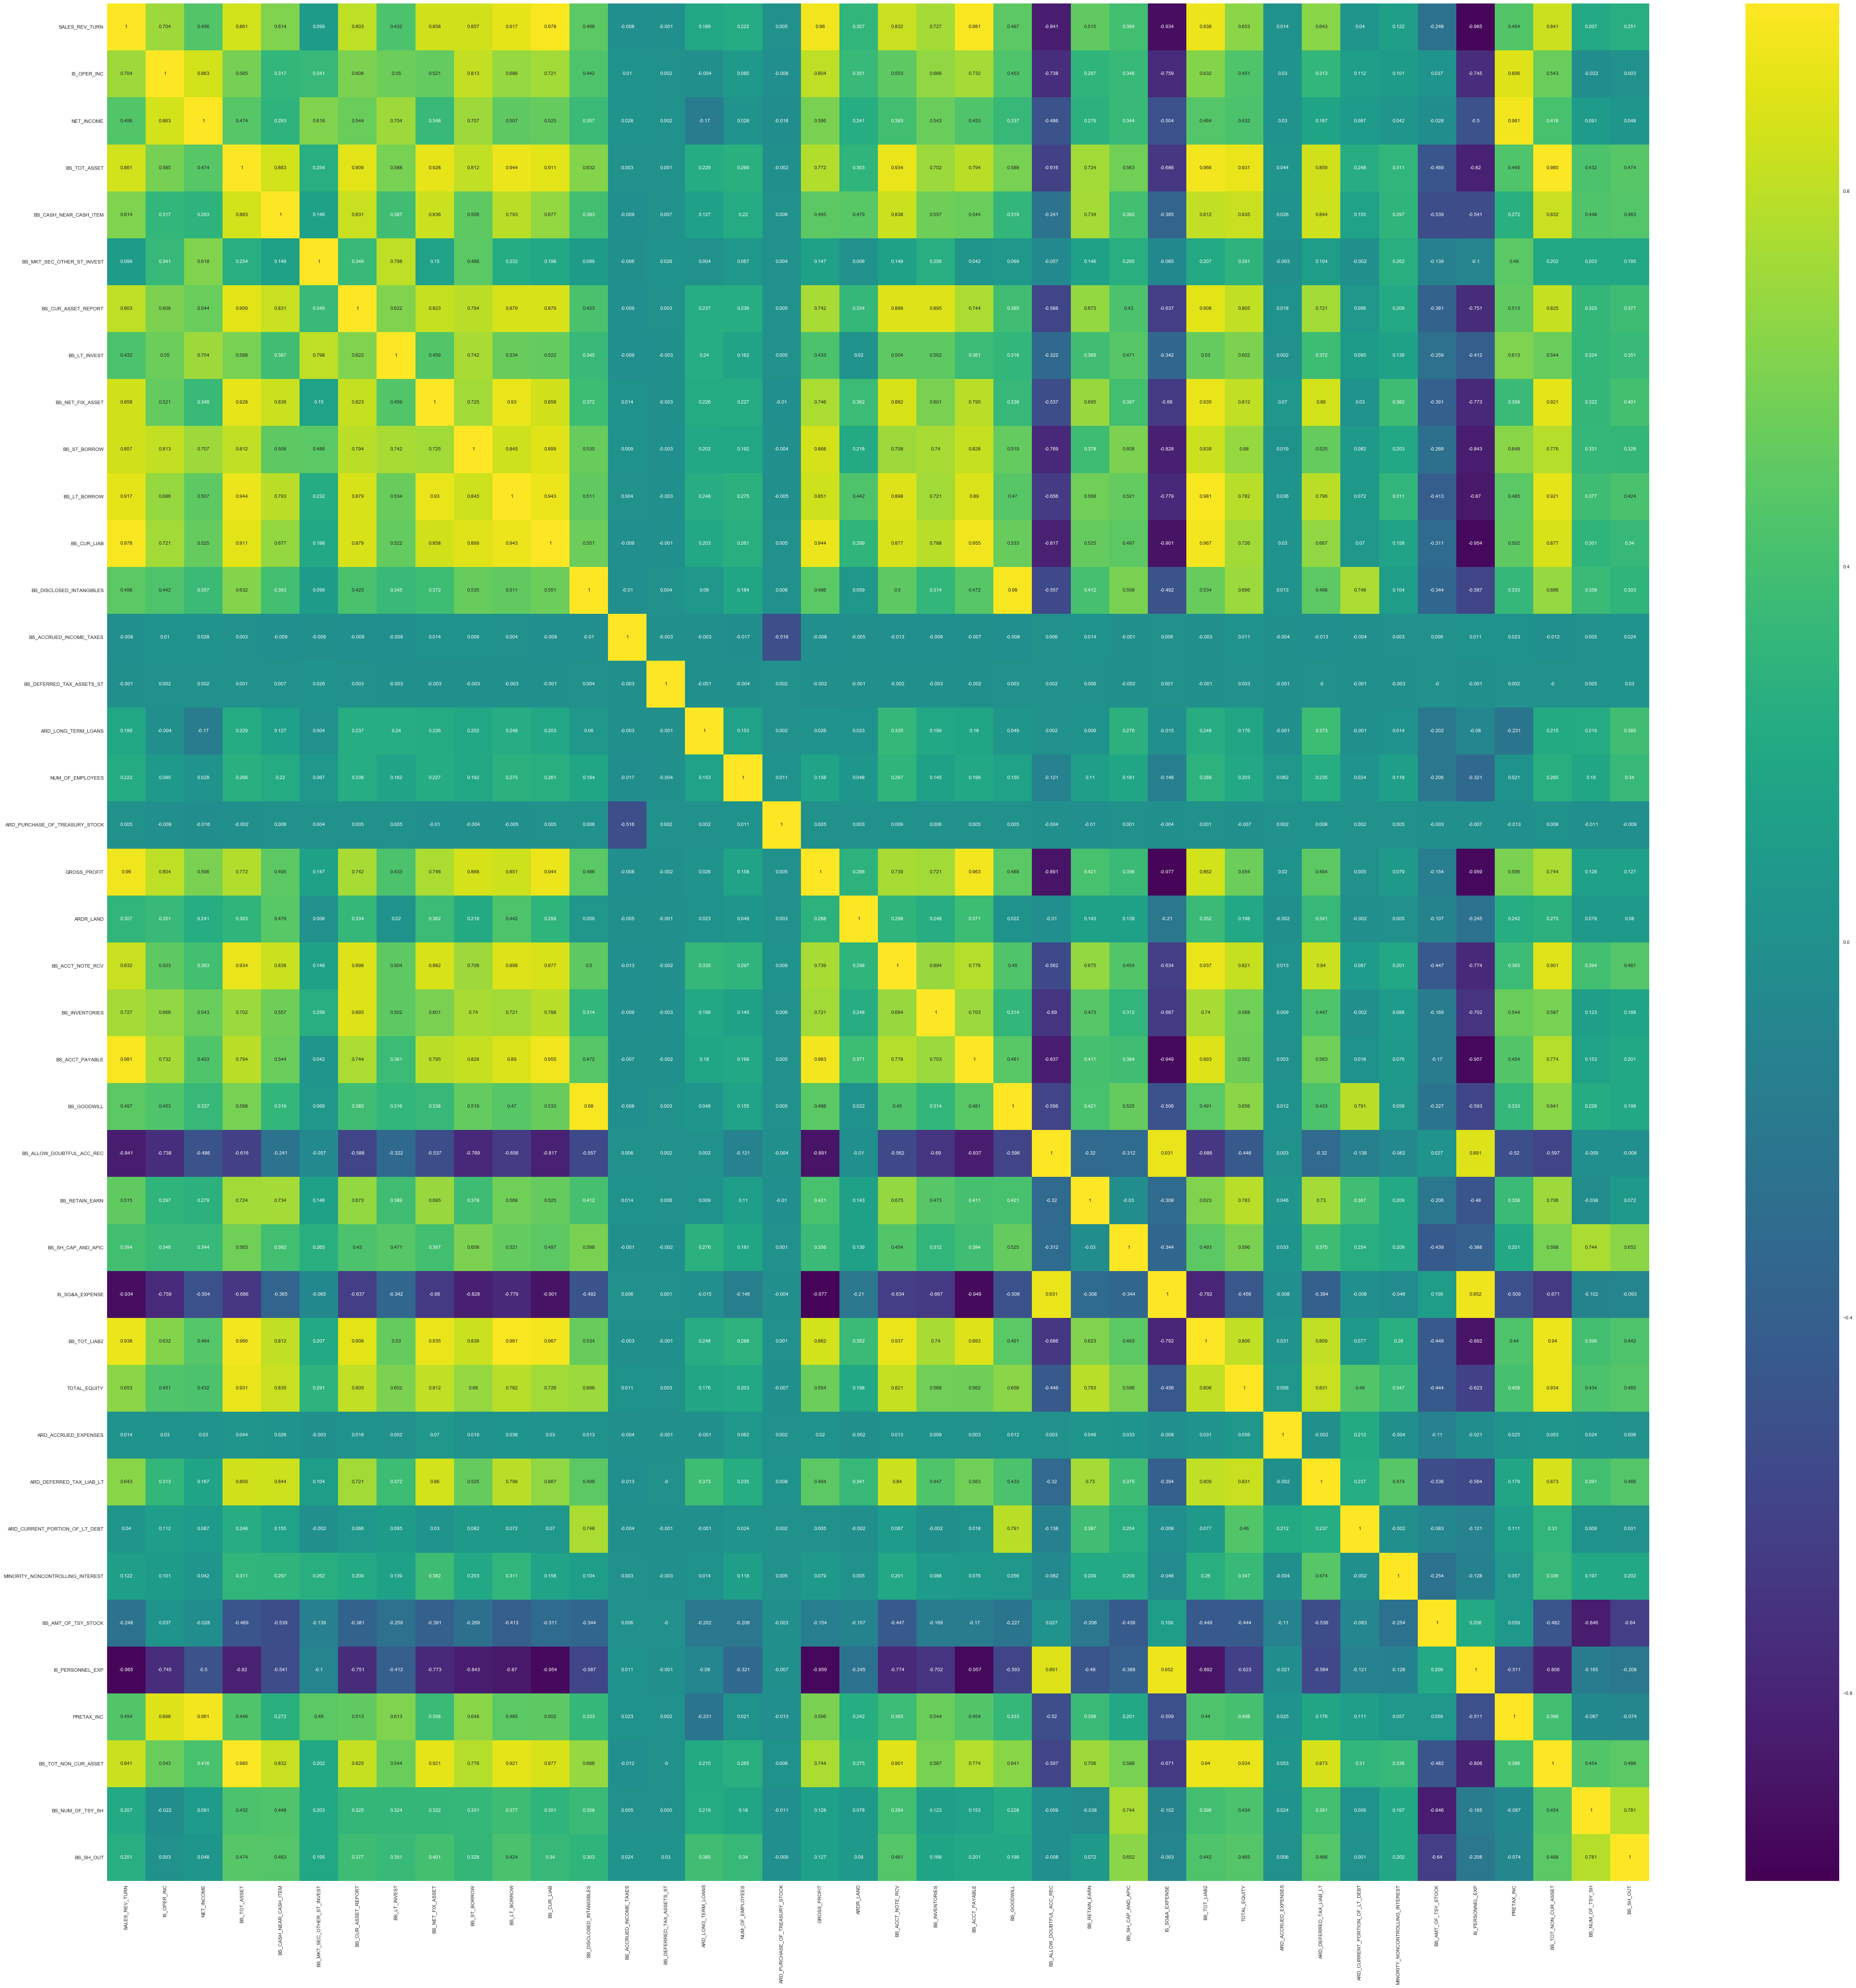

In [222]:
# without MKTCAP

engfeature = eng3.columns[2:-1]

plot_corr(eng3[engfeature], 70, 70)

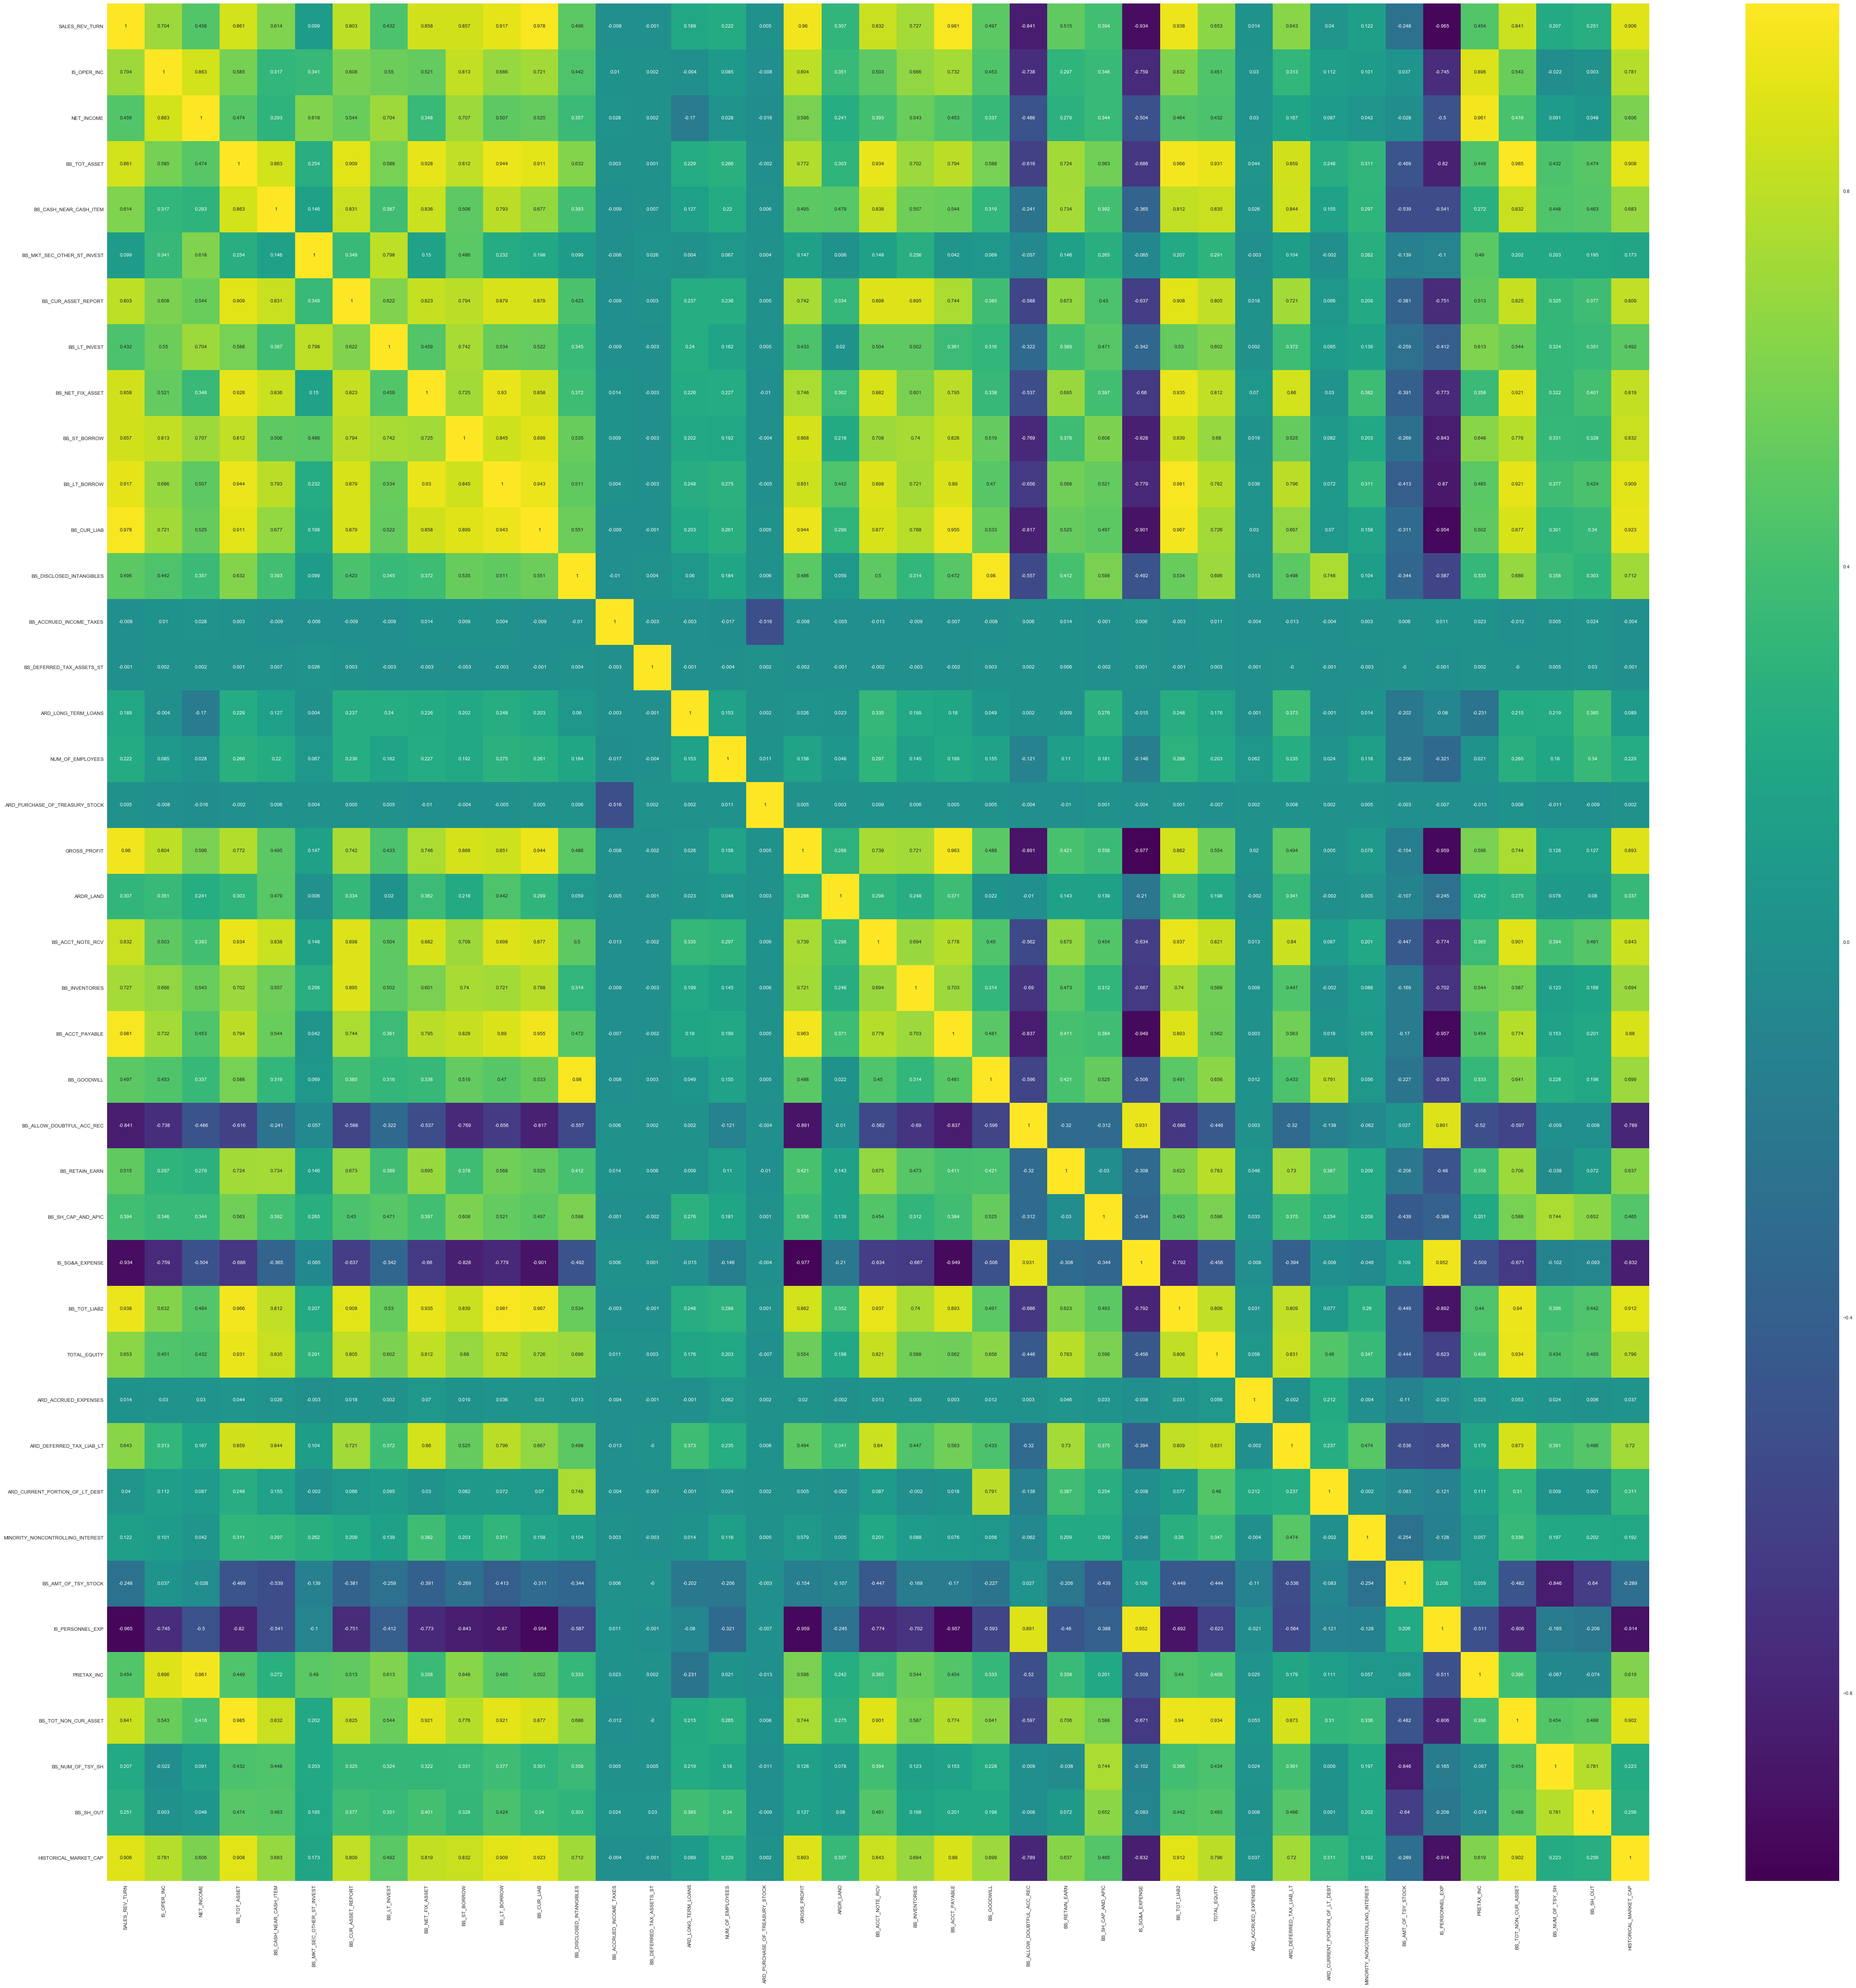

In [224]:
# with MKTCAP

engfeature = eng3.columns[2:]

plot_corr(eng3[engfeature], 70, 70)

In [142]:
import scipy

# SAMPLE correlation coefficients - linear correlation 
# (pearson correlation coefficients, p-value for 2-tailed t-test of correlation)

scipy.stats.pearsonr(data2.iloc[:, 4], data2.iloc[:, 6] )

(0.2931340779353927, 4.4982287322453628e-26)

In [154]:
dim = data2[features]

corr = np.zeros((dim.shape[1], dim.shape[1]))
for i in range(dim.shape[1]):
    for j in range(dim.shape[1]):
        corr[i, j] = scipy.stats.pearsonr(dim.iloc[:, i], dim.iloc[:,j])[1]

In [162]:
# p-vlaue < 0.05, statistically significantly correlated variables
# number of variables the column variable is correlated to   

np.sum(corr < 0.05, axis = 0)

array([35, 32, 32, 36, 36, 32, 36, 35, 36, 36, 36, 36, 36,  2,  1, 26, 33,
        2, 34, 28, 36, 35, 34, 34, 31, 33, 35, 33, 36, 37,  6, 36, 24, 31,
       34, 36, 35, 36, 32, 32])

In [254]:
# the least correlated several variables

correlated = np.sum(corr < 0.05, axis = 0)
data2[features].columns[correlated < 7]

Index(['未払税金', '短期繰延税金資産', '自己株式の取得', '未払費用'], dtype='object')

### the others features are negatively or positively correlated 

in regression problem, when there is multicollinearity, Least Square Estimates are unbaised but the variance is high. i.e increased variance of estimated coefficients. http://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

if the goal is the final prediction result, but not the accuracy of the regression coefficients, nothing has to be done.

however, there are ways to reduce variance, which comes with the costs of higher bias.
- Ridge rergession 
- LASSO rergession 
- PCA

# PCA and regression model

In [271]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


###  standardizing variables first 

In [270]:
from sklearn.preprocessing import scale 

featuredf = eng3.iloc[:, 2:-1]
stdx = scale(featuredf)
stdx = pd.DataFrame(stdx, index = featuredf.index, columns = featuredf.columns)
stdx.head()

,SALES_REV_TURN,IS_OPER_INC,NET_INCOME,BS_TOT_ASSET,BS_CASH_NEAR_CASH_ITEM,BS_MKT_SEC_OTHER_ST_INVEST,BS_CUR_ASSET_REPORT,BS_LT_INVEST,BS_NET_FIX_ASSET,BS_ST_BORROW,...,ARD_ACCRUED_EXPENSES,ARD_DEFERRED_TAX_LIAB_LT,ARD_CURRENT_PORTION_OF_LT_DEBT,MINORITY_NONCONTROLLING_INTEREST,BS_AMT_OF_TSY_STOCK,IS_PERSONNEL_EXP,PRETAX_INC,BS_TOT_NON_CUR_ASSET,BS_NUM_OF_TSY_SH,BS_SH_OUT
0,-0.093941,-0.096244,-0.098747,-0.143598,-0.141443,-0.065794,-0.139541,-0.092165,-0.119708,-0.110760,...,-0.041524,-0.142118,-0.03814,-0.090075,0.078764,0.119074,-0.094360,-0.133306,-0.071165,-0.234362
1,-0.077253,-0.071627,-0.061853,-0.125413,-0.028216,-0.065794,-0.106640,-0.087606,-0.118674,-0.110760,...,-0.041524,-0.139046,-0.03814,-0.090075,0.078823,0.083868,-0.061349,-0.122140,-0.073594,-0.033796
2,-0.057972,0.107492,-0.022900,-0.049994,0.050748,-0.065794,-0.062220,-0.092165,-0.109928,-0.089819,...,-0.041524,-0.142118,-0.03814,-0.090075,0.078823,0.001434,-0.038068,-0.037838,-0.073594,0.129369
3,-0.094324,-0.097535,-0.091241,-0.143677,-0.142380,-0.065794,-0.140494,-0.092165,-0.119776,-0.110760,...,-0.041524,-0.142118,-0.03814,-0.090075,0.078823,0.124354,-0.088144,-0.133020,-0.073594,-0.150639
4,0.661338,-2.782865,-5.637041,2.351946,4.269621,-0.065794,2.042042,1.515096,2.797638,0.875865,...,-0.041524,5.736471,-0.03814,9.664573,-8.337260,-1.444543,-4.543171,2.362320,1.354836,0.717411


In [272]:
pca = PCA().fit(stdx)

In [279]:
# PCA summary function - where the input variable pca is a PCA object

def pca_summary(pca, standardised_data, out = True):
    names = ["PC" + str(i) for i in range(1, len(pca.explained_variance_ratio_) +  1)]
    a = list(np.std(pca.transform(standardised_data), axis = 0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_) + 1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index = names, columns = columns)
    if out:
        print("Importance of components:")
#         display(summary)
        print (summary)
    return summary

In [280]:
summary = pca_summary(pca, stdx)

Importance of components:
                   sdev                varprop               cumprop
     Standard deviation Proportion of Variance Cumulative Proportion
PC1            4.338166           4.704921e-01              0.470492
PC2            2.016354           1.016421e-01              0.572134
PC3            1.617709           6.542455e-02              0.637559
PC4            1.561446           6.095286e-02              0.698512
PC5            1.420095           5.041675e-02              0.748928
PC6            1.232481           3.797522e-02              0.786904
PC7            1.094455           2.994580e-02              0.816849
PC8            1.038622           2.696842e-02              0.843818
PC9            1.021041           2.606313e-02              0.869881
PC10           1.000693           2.503466e-02              0.894916
PC11           0.947376           2.243805e-02              0.917354
PC12           0.920650           2.118992e-02              0.938544
PC13    

In [281]:

# The standard deviation of the components is stored in a named row called sdev of the output variable made by the pca_summary function
summary.sdev

,Standard deviation
PC1,4.338166
PC2,2.016354
PC3,1.617709
PC4,1.561446
PC5,1.420095
PC6,1.232481
PC7,1.094455
PC8,1.038622
PC9,1.021041
PC10,1.000693


In [282]:
# The total variance explained by the components is the sum of the variances of the components
# As the variables are standerdized before apply PCA, the total amount of variance explained by the components should be 13.
np.sum(summary.sdev** 2)

Standard deviation    40.0
dtype: float64

### decide the number of components to use 


In [283]:
def screeplot(pca, standardised_values):
    fig = plt.figure(figsize = (10, 10))
    y = np.std(pca.transform(standardised_values), axis = 0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp." + str(i) for i in x], rotation = 60)
    plt.ylabel("Variance")
    plt.show()

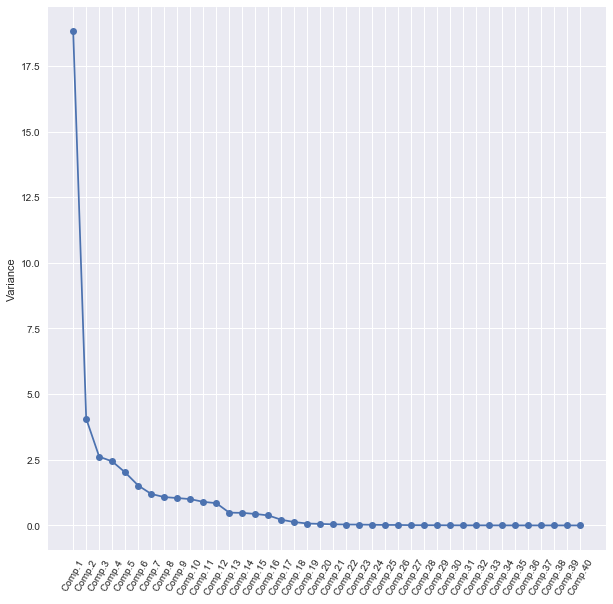

In [284]:
screeplot(pca, stdx)


In [285]:
# variance for each of the component  

summary.sdev ** 2

,Standard deviation
PC1,1.881968e+01
PC2,4.065685e+00
PC3,2.616982e+00
PC4,2.438114e+00
PC5,2.016670e+00
PC6,1.519009e+00
PC7,1.197832e+00
PC8,1.078737e+00
PC9,1.042525e+00
PC10,1.001386e+00


# SVM Regressor

In [175]:
# The free parameters in the model are C and epsilon.

from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [174]:
svr.score(x_test, y_test)

-0.024694833794155935

In [182]:
# tunning SVR using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [100, 50, 10], 'epsilon': [20, 50, 500]}
grid  = GridSearchCV(svr, param_grid)

grid.fit(data2[features], data2['value'])

print(grid)

# summarize grid search result 
print(grid.best_score_)
print(grid.best_estimator_.C)
print(grid.best_estimator_.epsilon)


GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [100, 50, 10], 'epsilon': [20, 50, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
-0.0133857841919
100
500


# Ridge Regression

In [99]:
from sklearn.linear_model import Ridge

from sklearn import linear_model
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test =  train_test_split(data2[features], data2['value'], test_size = 0.2, random_state = 0)

In [102]:
# default Ridge regression alpha = 0.1

rig = Ridge()
rig.fit(x_train, y_train)

# socre on testing data 
rig.score(x_test, y_test)

-1.0010489674415175

In [103]:
# CV on default Ridge regression

kf = 10

MSE = make_scorer(mean_squared_error)
np.mean(cross_val_score(rig, data2[features], data2['value'], cv = kf, scoring = MSE))

501072235.28292167

In [109]:
# Ridge tuning - using all data, didn't do train test split

from sklearn.model_selection import GridSearchCV 

# range of alpha values to test
alphas = np.array([1, 100000000, 10000, 200, 150, 100])

# create and fit a ridge regression for each alpha
tuned = Ridge()
grid = GridSearchCV(estimator = tuned, param_grid = dict(alpha = alphas))
grid.fit(data2[features], data2['value'])

print(grid)

# summarize grid search result 
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([        1, 100000000,     10000,       200,       150,       100])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
0.874812635029
100000000


In [114]:
tuned = Ridge (alpha = 100000000)
tuned.fit(x_train, y_train)

print (tuned.score(x_test, y_test))

kf = 10

from sklearn.metrics import make_scorer
MSE = make_scorer(mean_squared_error)
np.mean(cross_val_score(tuned, data2[features], data2['value'], cv = kf, scoring = MSE))

0.65157949605


53162411.921705082

In [115]:
tuned = Ridge (alpha = 100)
tuned.fit(x_train, y_train)

print (tuned.score(x_test, y_test))

kf = 10

MSE = make_scorer(mean_squared_error)
np.mean(cross_val_score(tuned, data2[features], data2['value'], cv = kf, scoring = MSE))

-1.0002036579


493628404.40302765

In [122]:
from sklearn.metrics import r2_score

tuned = Ridge(alpha = 10000000)
np.mean(cross_val_score(tuned, data2[features], data2['value'], cv = kf, scoring = 'r2'))

0.37301978800515967

In [123]:
from sklearn.metrics import r2_score

tuned = Ridge(alpha = 100)
np.mean(cross_val_score(tuned, data2[features], data2['value'], cv = kf, scoring = 'r2'))

-0.054197609456857476

# LASSO

In [77]:
features = data2.columns[2: 42]

In [78]:
features

Index(['売上', '営業利益', '純利益', '総資産', '現金･現金同等物', '有価証券', '流動資産', '総長期投資',
       '有形固定資産', '短期借入金', '長期借入金', '流動負債', '無形資産', '未払税金', '短期繰延税金資産', '長期貸付金',
       '従業員数', '自己株式の取得', '売上総利益', '土地2', '売掛金', '棚卸', '買掛金', 'のれん･営業権',
       '貸倒引当金', '剰余金', '資本金', '売上原価', '負債合計', '自己資本', '未払費用', '長期繰延税金負債',
       '長期借入金(当期返済分)', '少数持分', '自己株金額', '人件費', '税引前利益', '非流動資産合計', '自己株式数',
       '発行済株式数'],
      dtype='object')

In [79]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test =  train_test_split(data2[features], data2['value'], test_size = 0.2, random_state = 0)


In [80]:
reg = linear_model.Lasso()

reg.fit(x_train, y_train)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
reg.score(x_test, y_test)

-2.3051151943740464

In [82]:
selected = features[reg.coef_ > 0.01]

print (len(selected))
print (len(features))

15
40


# CV

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

from sklearn.metrics import make_scorer 

In [84]:
# testing error estimation of the LASSO using MSE as metrics

kf = 10

MSE = make_scorer(mean_squared_error)
np.mean(cross_val_score(reg, data2[features], data2['value'], cv = kf, scoring = MSE))

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

416128097.96905684

In [124]:
# CV using r2 metrics 

np.mean(cross_val_score(reg, data2[features], data2['value'], cv = kf, scoring = 'r2'))

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

0.087187752071551647

In [137]:
# high variability in prediction results

# cross_val_score(reg, data2[features], data2['value'], cv = kf, scoring = 'r2')


# Tuned LASSO

In [85]:
# Cross-validated Lasso, using the LARS algorithm

from sklearn.linear_model import LassoLarsCV

model = LassoLarsCV(cv = 10, precompute=False).fit(x_train, y_train)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 49 iterations, alpha=8.772e+01, previous alpha=1.429e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 59 iterations, alpha=2.221e+01, previous alpha=7.179e-02, with an active set of 34 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 59 iterations, alpha=1.02

In [87]:
model.score(x_test, y_test)

0.83980265976109714

In [132]:
model.alpha_

133.87923114050309

In [139]:
# CV using r2 metrics 

# cross_val_score(model, data2[features], data2['value'], cv = kf, scoring = 'r2')
print (np.mean(cross_val_score(model, data2[features], data2['value'], cv = kf, scoring = 'r2')))

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 48 iterations, alpha=1.618e+02, previous alpha=8.276e-01, with an active set of 23 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 50 iterations, alpha=7.860e+01, previous alpha=3.348e-01, with an active set of 29 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 62 iterations, alpha=8.51

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 49 iterations, alpha=6.614e+01, previous alpha=9.548e-01, with an active set of 24 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 58 iterations, alpha=2.478e+01, previous alpha=1.684e-02, with an active set of 37 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 66 iterations, alpha=3.40

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 56 iterations, alpha=1.667e+00, previous alpha=3.734e-01, with an active set of 29 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 53 iterations, alpha=8.761e+01, previous alpha=3.620e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 70 iterations, alpha=1.59

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=3.102e-01, previous alpha=2.704e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 60 iterations, alpha=8.493e+00, previous alpha=2.416e-01, with an active set of 31 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=1.84

0.595566822051


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 62 iterations, alpha=1.344e+01, previous alpha=1.237e-01, with an active set of 31 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 59 iterations, alpha=1.432e+01, previous alpha=1.356e-01, with an active set of 34 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 59 iterations, alpha=5.70

In [86]:
features[model.coef_ > 0.01]

Index(['営業利益', '純利益', '総資産', '無形資産', '売上総利益', '非流動資産合計'], dtype='object')

In [88]:
tuned = features[model.coef_ > 0.01]

print (len(tuned))
print (len(features))

6
40


In [89]:
tuned

Index(['営業利益', '純利益', '総資産', '無形資産', '売上総利益', '非流動資産合計'], dtype='object')

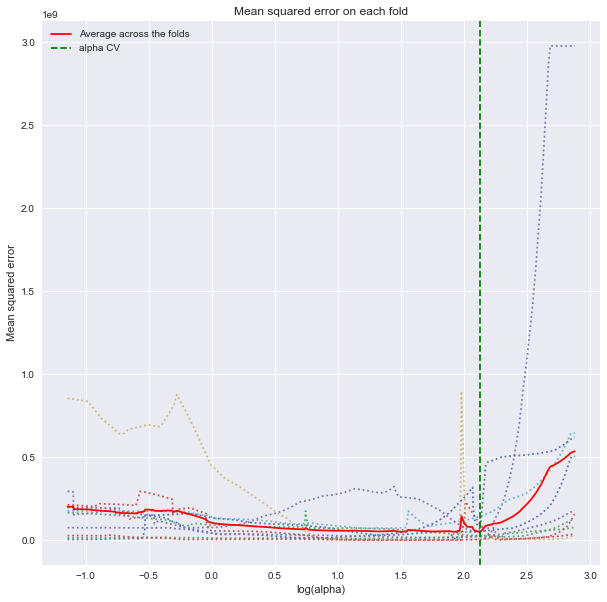

In [90]:
# plot mean square error for each fold

m_log_alphascv = np.log10(model.cv_alphas_)

fig = plt.figure(figsize = (10, 10))

plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis = -1), 'red', label = 'Average across the folds')
plt.axvline(np.log10(model.alpha_), linestyle = '--', color = 'green', label = 'alpha CV')

plt.legend()
plt.xlabel('log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

plt.show()

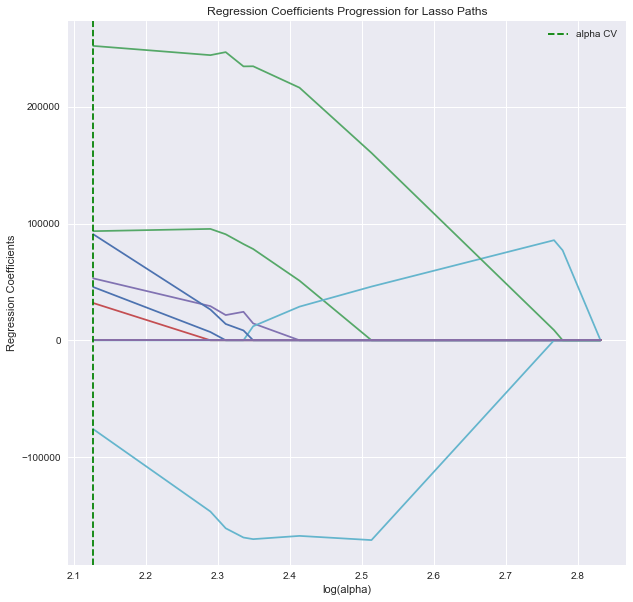

In [91]:
# plot coefficient progression

fig = plt.figure(figsize = (10, 10))
m_log_alphas = np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(np.log10(model.alpha_), linestyle = '--', color = 'green', label = 'alpha CV')
plt.ylabel('Regression Coefficients')
plt.legend()
plt.xlabel('log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

plt.show()

# CV on Tuned LASSO

In [92]:
# model
folds      = [10, 20, 50, 100, 150, 200, 250]
n_folds    = len(folds)
MSE_tuned  = []
n = data2[features].shape[0]

MSE = make_scorer(mean_squared_error)

# Run K-folds
for k in folds:

    scores = cross_val_score(model, data2[features], data2['value'], cv = k, scoring = MSE)
    MSE_tuned .append(scores.mean())

    print("K = {}, MSE_tuned : {}".format (k, MSE_tuned[-1]))
    
    
# Print chart
fig = plt.figure(figsize = (10, 10))
plt.errorbar(range(1, n_folds + 1), MSE_tuned , yerr=[5] * n_folds)  # Use 5% for the error bars
ax = plt.gca()
plt.xticks(range(0, n_folds + 2), [''] + [str(k) for k in folds] + [''])
# plt.yticks(range(30, 110, 10))

plt.title("K-fold Cross-validation testing error estimation")
plt.xlabel("number of folds")
plt.ylabel("MSE_tuned ")

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 48 iterations, alpha=1.618e+02, previous alpha=8.276e-01, with an active set of 23 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 50 iterations, alpha=7.860e+01, previous alpha=3.348e-01, with an active set of 29 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 62 iterations, alpha=8.51

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 49 iterations, alpha=6.614e+01, previous alpha=9.548e-01, with an active set of 24 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 58 iterations, alpha=2.478e+01, previous alpha=1.684e-02, with an active set of 37 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 66 iterations, alpha=3.40

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 70 iterations, alpha=1.595e+02, previous alpha=8.346e-02, with an active set of 35 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 61 iterations, alpha=2.833e+01, previous alpha=1.420e-01, with an active set of 34 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 55 iterations, alpha=8.26

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 64 iterations, alpha=3.202e+01, previous alpha=4.009e-01, with an active set of 31 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=3.102e-01, previous alpha=2.704e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 60 iterations, alpha=8.49

K = 10, MSE_tuned : 256684005.47316408


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 47 iterations, alpha=3.596e+01, previous alpha=7.001e-01, with an active set of 26 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 48 iterations, alpha=3.790e+00, previous alpha=5.954e-01, with an active set of 25 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 51 iterations, alpha=1.70

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 49 iterations, alpha=5.372e+01, previous alpha=7.364e-01, with an active set of 26 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 68 iterations, alpha=9.212e+00, previous alpha=5.183e-02, with an active set of 35 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=1.01

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 53 iterations, alpha=7.225e+00, previous alpha=3.041e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 61 iterations, alpha=5.193e+01, previous alpha=1.805e-01, with an active set of 34 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 46 iterations, alpha=4.30

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 55 iterations, alpha=2.164e+01, previous alpha=1.548e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 52 iterations, alpha=1.580e+02, previous alpha=4.913e-01, with an active set of 29 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 59 iterations, alpha=5.71

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 63 iterations, alpha=9.940e+00, previous alpha=1.632e-01, with an active set of 34 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 55 iterations, alpha=6.771e+01, previous alpha=1.717e-01, with an active set of 36 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 55 iterations, alpha=2.64

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 55 iterations, alpha=1.050e+01, previous alpha=2.286e-01, with an active set of 30 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 52 iterations, alpha=4.633e-01, previous alpha=3.687e-01, with an active set of 29 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 59 iterations, alpha=4.68

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 43 iterations, alpha=2.692e+00, previous alpha=1.198e+00, with an active set of 22 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 59 iterations, alpha=5.769e+01, previous alpha=3.641e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 63 iterations, alpha=4.93

K = 20, MSE_tuned : 38390531.42951919


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 50 iterations, alpha=1.029e+02, previous alpha=2.983e-01, with an active set of 29 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 48 iterations, alpha=2.192e+00, previous alpha=6.398e-01, with an active set of 25 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=1.35

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 55 iterations, alpha=4.678e+01, previous alpha=5.280e-01, with an active set of 28 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 60 iterations, alpha=2.783e+01, previous alpha=4.778e-02, with an active set of 35 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 58 iterations, alpha=2.65

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 59 iterations, alpha=1.386e+01, previous alpha=9.392e-02, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 49 iterations, alpha=3.840e+01, previous alpha=3.568e-01, with an active set of 30 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 49 iterations, alpha=4.92

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=4.496e+01, previous alpha=3.154e-01, with an active set of 28 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=4.357e+01, previous alpha=3.655e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 53 iterations, alpha=6.49

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 63 iterations, alpha=4.493e+01, previous alpha=6.702e-02, with an active set of 34 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 58 iterations, alpha=2.144e+01, previous alpha=3.580e-01, with an active set of 31 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 58 iterations, alpha=3.43

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 52 iterations, alpha=1.298e+01, previous alpha=3.184e-01, with an active set of 27 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 56 iterations, alpha=6.562e+01, previous alpha=3.269e-01, with an active set of 33 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 53 iterations, alpha=1.10

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=2.941e+00, previous alpha=1.629e-01, with an active set of 36 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 62 iterations, alpha=2.864e+00, previous alpha=1.895e-01, with an active set of 33 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 50 iterations, alpha=1.03

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 52 iterations, alpha=3.535e+01, previous alpha=3.813e-01, with an active set of 27 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 63 iterations, alpha=1.502e+02, previous alpha=3.750e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 49 iterations, alpha=4.30

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 59 iterations, alpha=2.661e+00, previous alpha=1.105e-01, with an active set of 30 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=4.223e+01, previous alpha=3.371e-01, with an active set of 31 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 44 iterations, alpha=6.05

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 52 iterations, alpha=8.992e+01, previous alpha=2.450e-01, with an active set of 31 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=9.961e+01, previous alpha=4.693e-01, with an active set of 28 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 52 iterations, alpha=1.47

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 61 iterations, alpha=3.850e+01, previous alpha=1.746e-01, with an active set of 34 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 49 iterations, alpha=1.143e+01, previous alpha=4.070e-01, with an active set of 30 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 50 iterations, alpha=9.66

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 63 iterations, alpha=5.366e+00, previous alpha=1.567e-01, with an active set of 34 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 55 iterations, alpha=6.560e+01, previous alpha=1.682e-01, with an active set of 36 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=2.68

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 46 iterations, alpha=6.979e+01, previous alpha=3.969e-01, with an active set of 27 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 53 iterations, alpha=1.322e+02, previous alpha=4.919e-01, with an active set of 30 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 48 iterations, alpha=3.76

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 56 iterations, alpha=1.236e+02, previous alpha=3.405e-01, with an active set of 29 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 53 iterations, alpha=4.541e+01, previous alpha=4.071e-01, with an active set of 28 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 55 iterations, alpha=7.23

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 73 iterations, alpha=1.008e+01, previous alpha=8.519e-02, with an active set of 34 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 58 iterations, alpha=1.844e+01, previous alpha=1.014e-01, with an active set of 35 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 55 iterations, alpha=1.31

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 52 iterations, alpha=7.758e+00, previous alpha=3.835e-01, with an active set of 29 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 59 iterations, alpha=4.589e+00, previous alpha=3.364e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 59 iterations, alpha=2.94

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 65 iterations, alpha=7.492e+00, previous alpha=6.866e-02, with an active set of 36 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 45 iterations, alpha=4.646e+01, previous alpha=7.561e-01, with an active set of 26 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 65 iterations, alpha=3.42

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 61 iterations, alpha=4.188e+01, previous alpha=1.173e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 71 iterations, alpha=8.371e+00, previous alpha=1.117e-03, with an active set of 38 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 64 iterations, alpha=2.52

K = 50, MSE_tuned : 36478100.52185601


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 53 iterations, alpha=1.268e+02, previous alpha=2.960e-01, with an active set of 30 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 48 iterations, alpha=2.161e+00, previous alpha=6.321e-01, with an active set of 25 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=1.26

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 55 iterations, alpha=3.986e+01, previous alpha=3.484e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=1.700e+00, previous alpha=7.888e-02, with an active set of 34 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 53 iterations, alpha=1.26

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 68 iterations, alpha=6.651e-01, previous alpha=1.980e-01, with an active set of 33 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=7.211e+00, previous alpha=1.996e-01, with an active set of 34 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 61 iterations, alpha=7.74

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 53 iterations, alpha=1.268e+02, previous alpha=2.960e-01, with an active set of 30 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 48 iterations, alpha=8.132e+01, previous alpha=5.958e-01, with an active set of 27 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 48 iterations, alpha=1.27

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 53 iterations, alpha=2.040e+02, previous alpha=3.374e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 53 iterations, alpha=1.320e+02, previous alpha=4.613e-01, with an active set of 30 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 61 iterations, alpha=9.17

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=1.044e+01, previous alpha=1.025e-01, with an active set of 35 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 53 iterations, alpha=1.320e+02, previous alpha=4.613e-01, with an active set of 30 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 59 iterations, alpha=1.17

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 56 iterations, alpha=2.112e+01, previous alpha=1.014e-01, with an active set of 35 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 53 iterations, alpha=1.320e+02, previous alpha=4.613e-01, with an active set of 30 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 58 iterations, alpha=1.17

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 56 iterations, alpha=2.085e+01, previous alpha=1.000e-01, with an active set of 35 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 51 iterations, alpha=1.010e+02, previous alpha=4.441e-01, with an active set of 30 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 47 iterations, alpha=3.87

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 61 iterations, alpha=7.780e+01, previous alpha=2.350e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 58 iterations, alpha=5.377e+01, previous alpha=9.816e-02, with an active set of 33 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=2.65

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=2.645e+01, previous alpha=3.788e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 58 iterations, alpha=1.661e+02, previous alpha=6.947e-02, with an active set of 35 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=3.06

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 61 iterations, alpha=6.609e+01, previous alpha=2.250e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 53 iterations, alpha=1.480e+00, previous alpha=1.770e-01, with an active set of 30 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 56 iterations, alpha=6.74

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 55 iterations, alpha=2.950e+00, previous alpha=1.726e-01, with an active set of 36 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 62 iterations, alpha=9.971e+01, previous alpha=1.218e-01, with an active set of 35 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 51 iterations, alpha=5.87

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=2.642e+01, previous alpha=3.750e-01, with an active set of 32 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=1.661e+02, previous alpha=9.258e-02, with an active set of 34 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 55 iterations, alpha=2.78

KeyboardInterrupt: 

In [94]:
kf = 10

MSE = make_scorer(mean_squared_error)
np.mean(cross_val_score(model, data2[features], data2['value'], cv = kf, scoring = MSE))

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 48 iterations, alpha=1.618e+02, previous alpha=8.276e-01, with an active set of 23 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 50 iterations, alpha=7.860e+01, previous alpha=3.348e-01, with an active set of 29 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 62 iterations, alpha=8.51

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 49 iterations, alpha=6.614e+01, previous alpha=9.548e-01, with an active set of 24 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 58 iterations, alpha=2.478e+01, previous alpha=1.684e-02, with an active set of 37 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 66 iterations, alpha=3.40

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 56 iterations, alpha=6.244e+00, previous alpha=3.949e-01, with an active set of 31 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 49 iterations, alpha=9.393e+00, previous alpha=4.704e-01, with an active set of 30 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 56 iterations, alpha=8.52

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 44 iterations, alpha=8.858e+00, previous alpha=5.363e-01, with an active set of 27 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 56 iterations, alpha=1.644e+02, previous alpha=3.051e-01, with an active set of 31 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 58 iterations, alpha=1.10

256684005.47316408